In [90]:
import scipy as sp
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import nltk
import re
import os
import matplotlib.pyplot as plt

data = pd.read_csv('dating.csv')
data_m = data[data['gender'] == 1]
data_f = data[data['gender']== 0]
tupm=()
tupf=()
tm = data_m[['attractive_important','sincere_important','intelligence_important',\
        'funny_important','ambition_important','shared_interests_important']]
for i in ['attractive_important','sincere_important','intelligence_important',\
        'funny_important','ambition_important','shared_interests_important']:
    tupm = tupm + (round(tm[i].mean(),2),)
    
tf = data_f[['attractive_important','sincere_important','intelligence_important',\
        'funny_important','ambition_important','shared_interests_important']]
for i in ['attractive_important','sincere_important','intelligence_important',\
        'funny_important','ambition_important','shared_interests_important']:
    tupf = tupf + (round(tf[i].mean(),2),)
print tupm
print tupf

(0.26, 0.17, 0.2, 0.18, 0.09, 0.11)
(0.18, 0.18, 0.21, 0.17, 0.13, 0.12)


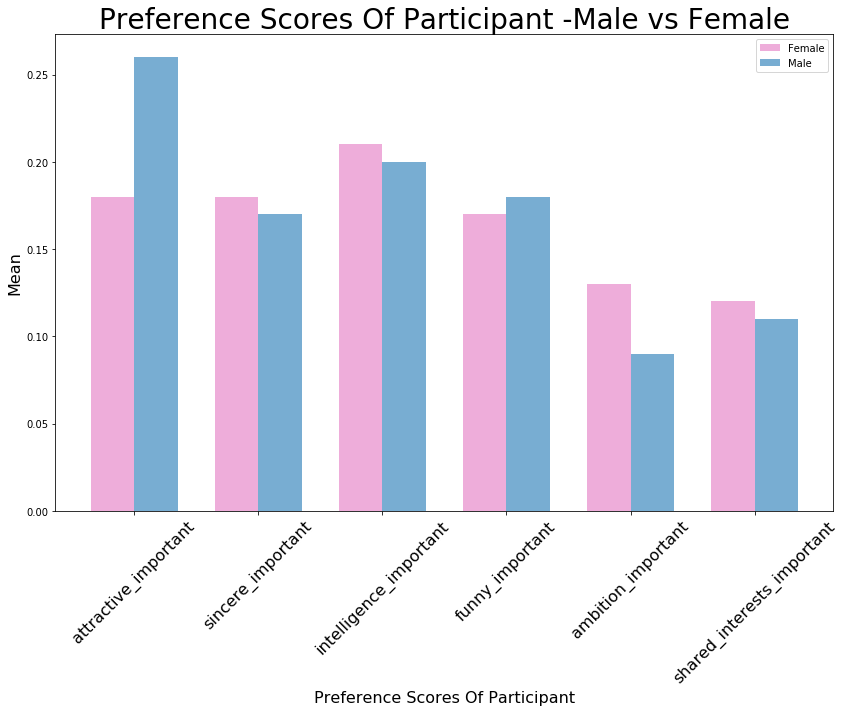

In [88]:
 
n_groups = 6
#fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width =0.35
opacity = 0.6
plt.figure(figsize=(12, 10))
rects1 = plt.bar(index, tupf, bar_width,alpha=opacity,color='tab:pink',label='Female')
rects2 = plt.bar(index + bar_width, tupm, bar_width,alpha=opacity,color='tab:blue',label='Male')
plt.title('Preference Scores Of Participant -Male vs Female',fontsize=28)
plt.xlabel('Preference Scores Of Participant',fontsize=16)
plt.xticks(index + 0.5*bar_width, ['attractive_important', 'sincere_important', 'intelligence_important', 'funny_important','ambition_important',\
'shared_interests_important'],fontsize=16,rotation=45)
plt.ylabel('Mean',fontsize=16)
plt.legend()
plt.tight_layout()
plt.savefig('temp.png', dpi=100)

Preferences of partners

In [89]:
import scipy as sp
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import nltk
import re
import os

data = pd.read_csv('dating-full.csv')
def rem_col(df):
    df['string_race'] = 0
    df['count_race'] = 0
    if str(df['race'])[0] == str("\'") and str(df['race'])[-1] == str("\'"):
        df['string_race'] = str(df['race'])[1:-1]
        df['count_race'] = 1
    else:
        df['string_race'] = str(df['race'])
        df['count_race'] = 0

    df['string_race_o'] = 0    
    df['count_race_o'] = 0
    if str(df['race_o'])[0] == str("\'") and str(df['race_o'])[-1] == str("\'"):
        df['string_race_o'] = str(df['race_o'])[1:-1]
        df['count_race_o'] = 1
    else:
        df['string_race_o'] = str(df['race_o'])
        df['count_race_o'] = 0

    df['string_field'] = 0    
    df['count_field'] = 0
    if str(df['field'])[0] == str("\'") and str(df['field'])[-1] == str("\'"):
        df['string_field'] = str(df['field'])[1:-1]
        df['count_field'] = 1
    else:
        df['string_field'] = str(df['field'])
        df['count_field'] = 0
    return df
def mod_col(df):
    df['lower_field'] = 0
    df['count_lower'] = 0
    if df['field'].islower() == False:
        df['count_lower'] = 1
        df['lower_field'] = str(df['field'].lower())
    else:
        df['count_lower'] = 0
        df['lower_field'] = str(df['field'])
    return df

#axis =1 is same as axis = columns
t = data[['race','race_o','field']].apply(rem_col,axis=1)
data['race'] = t['string_race']
data['race_o'] = t['string_race_o']
data['field'] = t['string_field']

print "Quotes removed from ",sum(t['count_race'])+sum(t['count_race_o'])+sum(t['count_field']),"cells"

t1 = data[['field']].apply(mod_col,axis=1)
data['field'] = t1['lower_field']
print "Standardized", sum(t1['count_lower']),"cells to lower case"
t2 = data[['race','race_o','gender','field']]
for i in ['race','race_o','gender','field']:
    A = pd.DataFrame(np.sort(t2[i].unique()),columns=[i])
    A[i+'_enum'] = range(len(t2[i].unique()))
    t2 = t2.merge(A, on= i, how= 'left')
data['gender'] = t2['gender_enum']
data['race'] = t2['race_enum']
data['race_o'] = t2['race_o_enum']
data['field'] = t2['field_enum']

print "Value assigned for male in column gender:",\
        t2.loc[t2.gender=='male','gender_enum'].values[0]
print "Value assigned for European/Caucasian-American in column race:",\
        t2.loc[t2.race=='European/Caucasian-American','race_enum'].values[0]
print "Value assigned for Latino/Hispanic American in column raceo:",\
        t2.loc[t2.race_o=='Latino/Hispanic American','race_o_enum'].values[0]
print "Value assigned for law in column field:",\
        t2.loc[t2.field=='law','field_enum'].values[0]
# In[79]:

#data[data['gender']=='male']

t3=data[['attractive_important','sincere_important','intelligence_important',\
            'funny_important','ambition_important','shared_interests_important',\
            'pref_o_attractive','pref_o_sincere','pref_o_intelligence',\
            'pref_o_funny','pref_o_ambitious','pref_o_shared_interests']]

t3['total'] = \
        t3[['attractive_important','sincere_important','intelligence_important',\
        'funny_important','ambition_important','shared_interests_important']].sum(axis=1)
for i in ['attractive_important','sincere_important','intelligence_important',\
        'funny_important', 'ambition_important',\
        'shared_interests_important']:            
    t3[i+"_new"] = t3[i].div(t3.total,axis="index")
t3['total1'] = \
        t3[['pref_o_attractive','pref_o_sincere','pref_o_intelligence',\
            'pref_o_funny','pref_o_ambitious','pref_o_shared_interests']].sum(axis=1)
for i in ['pref_o_attractive','pref_o_sincere','pref_o_intelligence',\
        'pref_o_funny','pref_o_ambitious','pref_o_shared_interests']:
    t3[i+"_new"] = t3[i].div(t3.total1,axis="index")
# In[ ]:
for i in ['attractive_important','sincere_important','intelligence_important',\
        'funny_important','ambition_important','shared_interests_important',\
        'pref_o_attractive','pref_o_sincere','pref_o_intelligence',\
        'pref_o_funny','pref_o_ambitious','pref_o_shared_interests']:
    data[i] = t3[i+"_new"]
for i in ['attractive_important','sincere_important','intelligence_important',\
        'funny_important','ambition_important','shared_interests_important',\
        'pref_o_attractive','pref_o_sincere','pref_o_intelligence',\
        'pref_o_funny','pref_o_ambitious','pref_o_shared_interests']:
    print "Mean of "+i+":",round(data[i].mean(),2)
data.to_csv('dating.csv',index = False)



Quotes removed from  8316 cells
Standardized 5707 cells to lower case
Value assigned for male in column gender: 1
Value assigned for European/Caucasian-American in column race: 2
Value assigned for Latino/Hispanic American in column raceo: 3
Value assigned for law in column field: 121
Mean of attractive_important: 0.22
Mean of sincere_important: 0.17
Mean of intelligence_important: 0.2
Mean of funny_important: 0.17
Mean of ambition_important: 0.11
Mean of shared_interests_important: 0.12
Mean of pref_o_attractive: 0.22
Mean of pref_o_sincere: 0.17
Mean of pref_o_intelligence: 0.2
Mean of pref_o_funny: 0.17
Mean of pref_o_ambitious: 0.11
Mean of pref_o_shared_interests: 0.12
